In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.io
import networkx as nx

## Ejercicio. Del archivo fve32.mat
- Muestra el heatmap de la matriz de activación
- Utilizando los nombres del archivo .mat, muestra el grafo en 4 formas distintas (shell debe ser una de ellas)
- Determina el nodo con mayores conexiones
- Muestra el grado solo destacando las conexiones del nodo encontrado en el ejercicio anterior

In [2]:
file_path = r"..\..\BCT\BCT\2019_03_03_BCT\data_and_demos\fve32.mat"

In [3]:
def open_mat_file(path):
    mat_json = scipy.io.loadmat(path)
    keys = list(mat_json.keys())
    
    lista = []
    for idx in range(3, len(mat_json.keys())):
        lista.append(mat_json[keys[idx]])
    return mat_json, lista

In [4]:
json, (names, cij) = open_mat_file(file_path)
json

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN, Created on: Fri Jun 29 16:26:48 2007',
 '__version__': '1.0',
 '__globals__': [],
 'Names': array(['  V1', '  V2', '  V3', '  VP', ' V3a', '  V4', ' VOT', ' V4t',
        '  MT', ' FST', 'PITd', 'PITv', 'CITd', 'CITv', 'AITd', 'AITv',
        'STPp', 'STPa', '  TF', '  TH', 'MSTd', 'MSTl', '  PO', ' PIP',
        ' LIP', ' VIP', ' MIP', ' MDP', '  DP', '  7a', ' FEF', '  46'],
       dtype='<U4'),
 'CIJ': array([[0, 1, 1, ..., 0, 0, 0],
        [1, 0, 1, ..., 0, 1, 0],
        [1, 1, 0, ..., 0, 1, 0],
        ...,
        [0, 0, 0, ..., 0, 1, 1],
        [0, 0, 0, ..., 1, 0, 1],
        [0, 0, 0, ..., 1, 1, 0]], dtype=uint8)}

<AxesSubplot:>

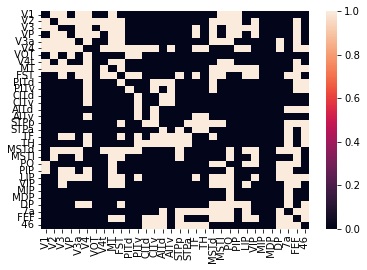

In [5]:
# Ej 1. Muestra el heatmap de la matriz de activación
sns.heatmap(cij, xticklabels=names, yticklabels=names)

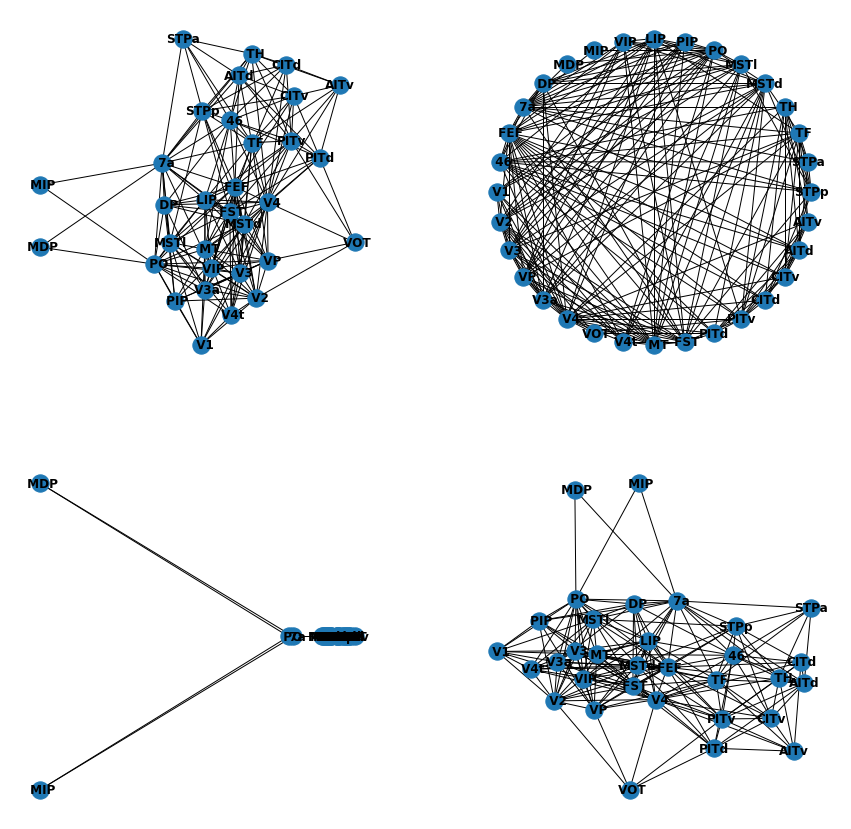

In [6]:
# Ej 2. Utilizando los nombres del archivo .mat, muestra el grafo en 4 formas distintas (shell debe ser una de ellas)
G = nx.from_numpy_array(cij)

node_labels = {idx: names[idx] for idx in range(len(cij))}
G = nx.relabel_nodes(G, node_labels)

fig = plt.figure(figsize=(15, 15))

plt.subplot(2, 2, 1)
nx.draw(G, with_labels=True, font_weight='bold')

plt.subplot(2, 2, 2)
nx.draw_shell(G, with_labels=True, font_weight='bold')

plt.subplot(2, 2, 3)
nx.draw_spectral(G, with_labels=True, font_weight='bold')

plt.subplot(2, 2, 4)
nx.draw_spring(G, with_labels=True, font_weight='bold')

In [7]:
# Ej 3. Determina el nodo con mayores conexiones

# Se calculan las conexiones para cada nodo
tot_conexiones = [cij[nodo].sum() for nodo in range(len(cij))]
# Se encuentra el maximo de conexiones
max_conexiones = max(tot_conexiones)
# Se encuentra cuantos nodos tienen ese número de conexiones
no_nodos_max_conexiones = tot_conexiones.count(max_conexiones)
if no_nodos_max_conexiones == 1:
    posicion = tot_conexiones.index(max_conexiones)
    nodo_max_conexiones = names[posicion]
else:
    nodo_max_conexiones = []
    posicion = -1
    for _ in range(no_nodos_max_conexiones):
        posicion = tot_conexiones.index(max_conexiones, posicion+1)
        nodo_max_conexiones.append(names[posicion])
        
print('El nodo con más conexiones es', nodo_max_conexiones)

El nodo con más conexiones es   V4


In [8]:
# Ej 4. Muestra el grafo solo destacando las conexiones del nodo encontrado en el ejercicio anterior
sub_matrix = cij.copy()
raws = list(range(len(sub_matrix)))
raws.remove(posicion)
for raw in raws:
    sub_matrix[raw][:posicion] = 0
    sub_matrix[raw][posicion+1:] = 0

<AxesSubplot:>

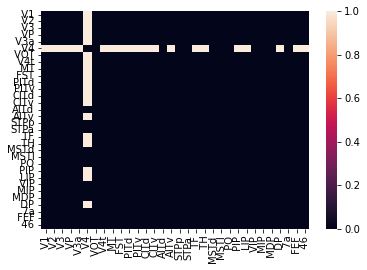

In [9]:
sns.heatmap(sub_matrix, xticklabels=names, yticklabels=names)

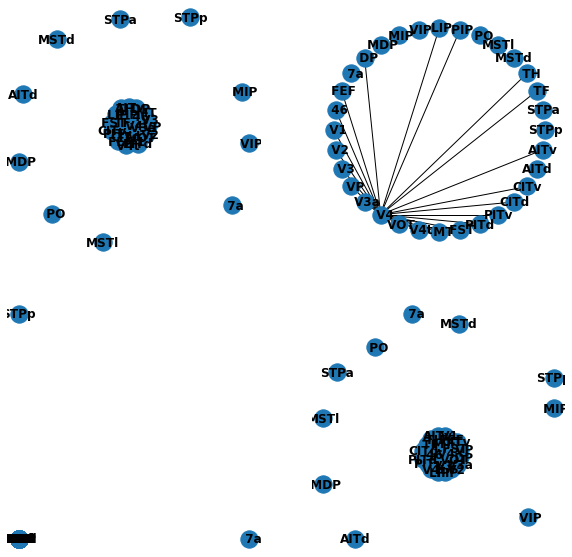

In [15]:
G = nx.from_numpy_array(sub_matrix)

node_labels = {idx: names[idx] for idx in range(len(sub_matrix))}
G = nx.relabel_nodes(G, node_labels)

fig = plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
nx.draw(G, with_labels=True, font_weight='bold')

plt.subplot(2, 2, 2)
nx.draw_shell(G, with_labels=True, font_weight='bold')

plt.subplot(2, 2, 3)
nx.draw_spectral(G, with_labels=True, font_weight='bold')

plt.subplot(2, 2, 4)
nx.draw_spring(G, with_labels=True, font_weight='bold')